In [1]:
# set of data - Credit default - characteritics - did they default or not?
# algoritm tries to find a way of drawing a boundary through the data so defaulters are on one side and non-defaulters on the other.
# ML algorithm is the instructions for exploring the data
# logistic regression
# XGBoost
# neural net

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from celluloid import Camera
from matplotlib.colors import ListedColormap
import time
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from textwrap import wrap
import matplotlib.patches as mpatches

In [9]:
dta = make_moons(noise=0.5, random_state=0)

In [10]:
X = dta[0]
y = dta[1]

In [11]:
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    # calculate the sigmoid of z
    h = 1/(1+np.exp(-z))    
    return h

def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = theta.T.dot(X.T)
        
        # get the sigmoid of z
        h = sigmoid(z)
        # calculate the cost function
        J = -1/m*(np.log(h).dot(y.T)+np.log(1-h).dot((1-y).T))
        # update the weights theta
        theta = theta-alpha/m*((h-y).dot(X)).T
        
    ### END CODE HERE ###
    J = float(J)
    return J, theta


def predictlog(theta,X):
    y_pred = sigmoid(theta.T.dot(X.T))
    return y_pred


In [15]:
h = .02
x_min, x_max = X[:,0].min() - .05, X[:,0].max() + .05
y_min, y_max = X[:,1].min() - .05, X[:,1].max() + .05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

## logistic regression

In [16]:
# Introduce lists where data points are being stored: 
theta_list=[]   # list contains weights
c_list=[]   # list contains costs 
ys_list=[]  # store arrays of predicted y-values for xs ( -> plot regression line!) 
cl_list = [] # list contains predicted y-values for x_train ( -> plot connecting lines!) 
acc_list = []

# Train model: 
theta = np.random.rand(2,1)
for i in range(60000):      # set number of epochs
    J,theta = gradientDescent(X, y, theta, 0.01, 1)
    theta_list.append(theta)    # append weights (=slopes) to list
    c_list.append(J)  # append costs to list
    ys_list.append(predictlog(theta,X).T)     # append pairs of predicted y-values for xs 
    acc = accuracy_score(y,(predictlog(theta,X).T.flatten()>=0.5)*1)
    acc_list.append(acc)   
    i=+1


## Neural Net

In [17]:
clf = MLPClassifier(random_state=1, alpha=0.01).partial_fit(X,y,np.unique(y))
Z_list = []
acc_list_nn = []
for i in range(2001):
    clf.partial_fit(X,y)
    Z_nn =clf.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = clf.predict(X)
    acc_nn = accuracy_score(pred,y)
    acc_list_nn.append(acc_nn)
    Z_list.append(Z_nn)
    i=+1


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


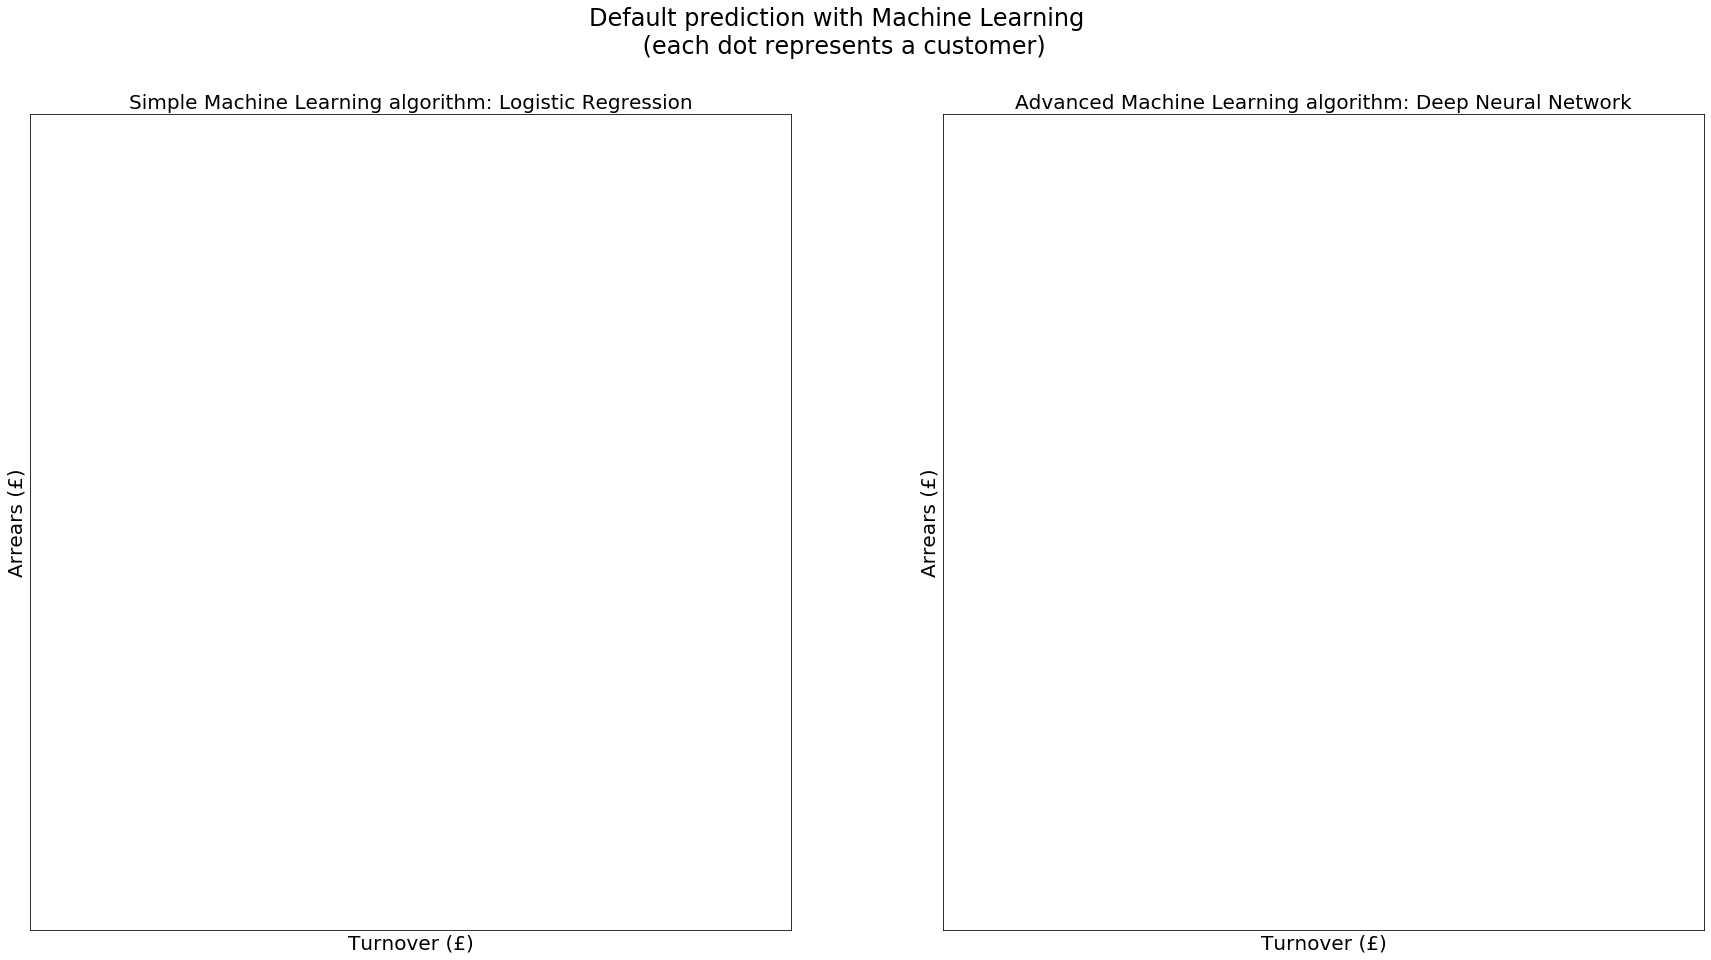

In [18]:
#fig = plt.figure(figsize=(15,30)) # create figure
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,15))
fig.suptitle("Default prediction with Machine Learning \n (each dot represents a customer)", fontsize=24)
camera = Camera(fig)  # create camera
# contour plot


for i in (range(0,2000,20)):
#for i in (list(range(0,10,1)) + list(range(10,1000,20))):
    h = .02
    x_min, x_max = X[:,0].min() - .05, X[:,0].max() + .05
    y_min, y_max = X[:,1].min() - .05, X[:,1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
   # ax = fig.add_subplot(1,1,1)
    ax1.set_xlim(xx.min(), xx.max())
    ax1.set_ylim(yy.min(), yy.max())
    ax1.set_xticks(())
    ax1.set_yticks(())
    
    ax2.set_xlim(xx.min(), xx.max())
    ax2.set_ylim(yy.min(), yy.max())
    ax2.set_xticks(())
    ax2.set_yticks(())
    
    #Create values for decision boundary
    
    Z_log =  predictlog(theta_list[i],np.c_[xx.ravel(), yy.ravel()])
    Z_log = Z_log.reshape(xx.shape)
    
    Z_nn =  Z_list[i]
    Z_nn = Z_nn.reshape(xx.shape)
    
    
    # Put the result into a color plot

    ax1.contourf(xx, yy, Z_log,[0,0.5,1], alpha=.4,cmap=cm_bright)
    ax2.contourf(xx, yy, Z_nn,[0,0.5,1], alpha=.4,cmap=cm_bright)
    
    # Plot the training points
    ax1.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright)
    ax2.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright)
    
    #ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),arrowprops=dict(facecolor='black', shrink=0.05))

    ax1.set_ylabel('Arrears (£)', size=20)
    ax1.set_xlabel('Turnover (£)', size=20)
    
    ax2.set_ylabel('Arrears (£)',size=20)
    ax2.set_xlabel('Turnover (£)',size=20)
    
    
    
    red_patch = mpatches.Patch(color='red', label='Default')
    blue_patch = mpatches.Patch(color='blue', label='No Default')

    ax1.legend(handles=[red_patch, blue_patch])
    ax2.legend(handles=[red_patch, blue_patch])
    #ax.set_title('The Logistic algorithm starts by drawing a line to seperate the defaulted from the non-defaulted accounts at random it calculates how well it performed and makes a small adjustment to the position of the line. It repeats this process over and over again. \n % correctly classified: \n {:.1f}'.format(acc_list[i]*100),fontsize=12)
    #ax1.text(x_min,y_min-0.12, 'The Logisitic algorithm starts by drawing a line at random to seperate the defaulted \nfrom the non-defaulted customers. It calculates how well that line separates the data \n and then makes a small adjustment to the position of the line to improve performance.\n It repeats this process over and over again, searching for the line which gives \n the best separation. That line can be used to predict whether any new account will default.', va="top", ha="left", fontsize=18)
    #ax2.text(x_min,y_min-0.12, 'More sophisticated machine learning algorithms, such as boosted trees or neural nets, \nwork in a similar way to logistic regression, but are not restricted to exploring linear relationships \nin the data. As a result they are able to find more complicated patterns and can produce \n more accurate results. However, to work well they require a lot more data than simpler algorithms.', va="top", ha="left", fontsize=18)
    ax2.annotate('Accuracy \n(% of customers correctly classified): \n {:.1f}'.format(acc_list_nn[i]*100),xy=(x_min+0.1,y_max-0.3), fontsize=20)
    ax1.annotate('Accuracy \n(% of customers correctly classified): \n {:.1f}'.format(acc_list[i]*100),xy=(x_min+0.1,y_max-0.3),fontsize=20)
    #lt.figtext(0.05,0.00, text, fontsize=8, va="top", ha="left")
    ax1.set_title( "Simple Machine Learning algorithm: Logistic Regression",size=20)
    ax2.set_title( "Advanced Machine Learning algorithm: Deep Neural Network",size=20)
    
    #plt.tight_layout()

    camera.snap() # take snapshot after each frame/iteration
       
    


animation = camera.animate(interval = 500,
                          repeat = False, repeat_delay = 500) # create animation 
animation.save('ML_training_L&L.gif', writer = 'imagemagick') # save animation


C:\Users\lundr\Miniconda3\envs\dsj\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


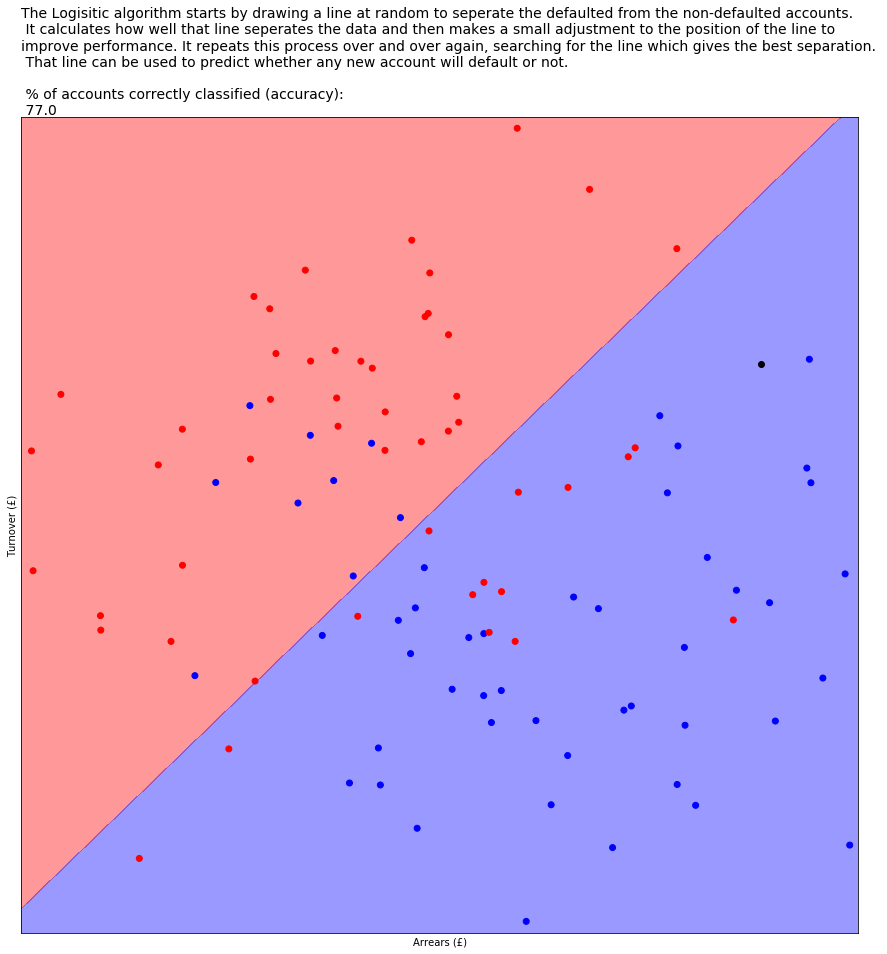

In [25]:
fig = plt.figure(figsize=(15,15)) # create figure
ax = fig.add_subplot(1,1,1)
i=10000
h = .02
x_min, x_max = X[:,0].min() - .05, X[:,0].max() + .05
y_min, y_max = X[:,1].min() - .05, X[:,1].max() + .05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = fig.add_subplot(1,1,1)



ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
Z =  predictlog(theta_list[i],np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
con= ax.contourf(xx, yy, Z,[0,0.5,1], alpha=.4,cmap=cm_bright)

# Plot the training points
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright)
ax.scatter([2],[1],color='black')
#ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_xlabel('Arrears (£)')
ax.set_ylabel('Turnover (£)')
#ax.set_title('The Logistic algorithm starts by drawing a line to seperate the defaulted from the non-defaulted accounts at random it calculates how well it performed and makes a small adjustment to the position of the line. It repeats this process over and over again. \n % correctly classified: \n {:.1f}'.format(acc_list[i]*100),fontsize=12)
ax.text(x_min,y_max+0.01, 'The Logisitic algorithm starts by drawing a line at random to seperate the defaulted from the non-defaulted accounts. \n It calculates how well that line seperates the data and then makes a small adjustment to the position of the line to \nimprove performance. It repeats this process over and over again, searching for the line which gives the best separation. \n That line can be used to predict whether any new account will default or not. \n\n % of accounts correctly classified (accuracy): \n {:.1f}'.format(acc_list[i]*100), fontsize=14)

plt.show()

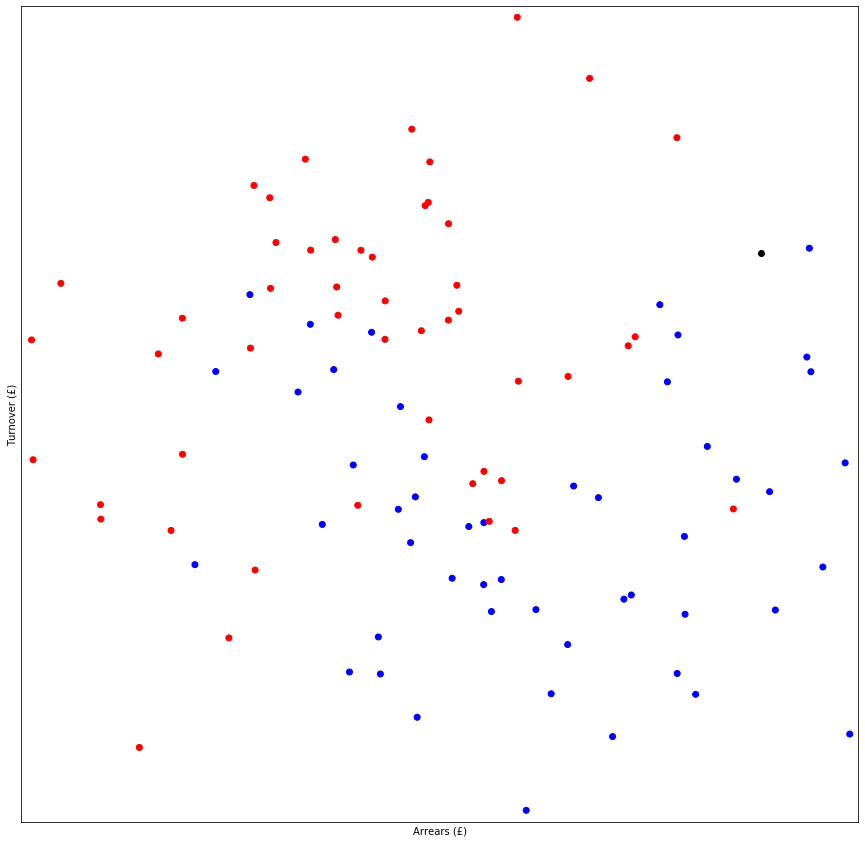

In [23]:
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
fig = plt.figure(figsize=(15,15)) # create figure
ax = fig.add_subplot(1,1,1)

# Plot the training points
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright)
ax.scatter([2],[1],color='black')
#ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_xlabel('Arrears (£)')
ax.set_ylabel('Turnover (£)')
plt.savefig('arrears_data.png')

In [3]:
## XGBoost

weight: [[-2.]]
y-intercept: [2.]
costs: 42.66666666666668


In [45]:
import xgboost as xgb

In [51]:
model = xgb.XGBClassifier()
model.fit(X, y)
y_pred =model.predict(X)
accuracy_score(y,y_pred)

1.0

In [53]:
from sklearn.neural_network import MLPClassifier


In [83]:
acc_list[99]

0.8

In [78]:
predictions = model_list[1000].predict(X)
acc_score = accuracy_score(y,predictions)
acc_score

1.0

C:\Users\lundr\Miniconda3\envs\dsj\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


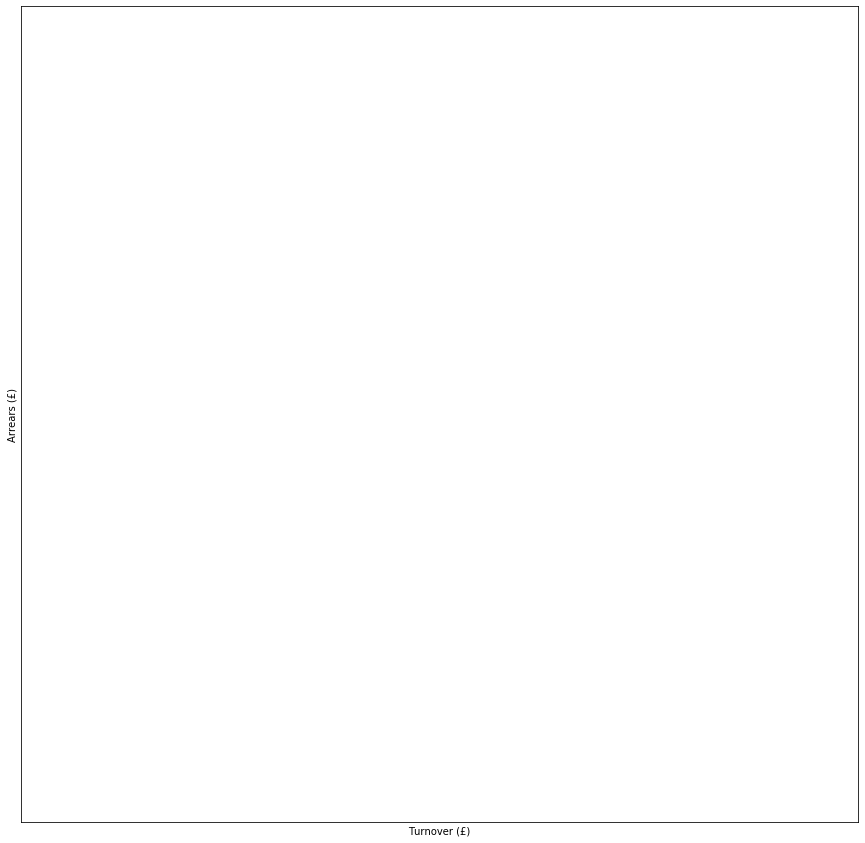

In [86]:
fig = plt.figure(figsize=(15,15)) # create figure
camera = Camera(fig)  # create camera
# contour plot


for i in (list(range(0,10,1)) + list(range(10,1000,20))):
    h = .02
    x_min, x_max = X[:,0].min() - .05, X[:,0].max() + .05
    y_min, y_max = X[:,1].min() - .05, X[:,1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = fig.add_subplot(1,1,1)

   

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
#     model_list[i].partial_fit(X,y)
#     predictions = model_list[i].predict(X)
#     acc_score = accuracy_score(y,predictions)
    Z =  Z_list[i]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    con= ax.contourf(xx, yy, Z,[0,0.5,1], alpha=.4,cmap=cm_bright)
    
    # Plot the training points
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright)
    #ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_ylabel('Arrears (£)')
    ax.set_xlabel('Turnover (£)')
    red_patch = mpatches.Patch(color='red', label='Default')
    blue_patch = mpatches.Patch(color='blue', label='No Default')

    ax.legend(handles=[red_patch, blue_patch])
    #ax.set_title('The Logistic algorithm starts by drawing a line to seperate the defaulted from the non-defaulted accounts at random it calculates how well it performed and makes a small adjustment to the position of the line. It repeats this process over and over again. \n % correctly classified: \n {:.1f}'.format(acc_list[i]*100),fontsize=12)
    ax.text(x_min,y_max+0.01, 'The Logisitic algorithm starts by drawing a line at random to seperate the defaulted \
    from the non-defaulted accounts. \n It calculates how well that line seperates the data and then makes a small adjustment \
    to the position of the line to \nimprove performance. It repeats this process over and over again, searching for the line\
    which gives the best separation. \n That line can be used to predict whether any new account will default or not.\
    \n\n % of accounts correctly classified (accuracy): \n {:.1f}'.format(acc_list[i]*100), fontsize=14)
    #plt.tight_layout()

    camera.snap() # take snapshot after each frame/iteration

# j=0
# for j in (range(0,20,1)):   
#     h = .02
#     x_min, x_max = X[:,0].min() - .05, X[:,0].max() + .05
#     y_min, y_max = X[:,1].min() - .05, X[:,1].max() + .05
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

#     # just plot the dataset first
#     cm = plt.cm.RdBu
#     cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#     ax = fig.add_subplot(1,1,1)

   

#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xticks(())
#     ax.set_yticks(())
#     Z =  predictlog(theta_list[9999],np.c_[xx.ravel(), yy.ravel()])

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     con= ax.contourf(xx, yy, Z,[0,0.5,1], alpha=.4,cmap=cm_bright)
    
#     # Plot the training points
#     ax.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright)
#     ax.scatter([1],[2.3], color='black', marker='x', s=100)
#     ax.text(1,2.3,"If we take a new account \n we can predict whether is will default \n or not based on which side of the line it falls")
#     #ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),arrowprops=dict(facecolor='black', shrink=0.05))
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xticks(())
#     ax.set_yticks(())
#     ax.set_ylabel('Arrears (£)')
#     ax.set_xlabel('Turnover (£)')
#     red_patch = mpatches.Patch(color='red', label='Default')
#     blue_patch = mpatches.Patch(color='blue', label='No Default')

#     ax.legend(handles=[red_patch, blue_patch])
#     #ax.set_title('The Logistic algorithm starts by drawing a line to seperate the defaulted from the non-defaulted accounts at random it calculates how well it performed and makes a small adjustment to the position of the line. It repeats this process over and over again. \n % correctly classified: \n {:.1f}'.format(acc_list[i]*100),fontsize=12)
#     ax.text(x_min,y_max+0.01, 'The Logisitic algorithm starts by drawing a line at random to seperate the defaulted from the non-defaulted accounts. \n It calculates how well that line seperates the data and then makes a small adjustment to the position of the line to \nimprove performance. It repeats this process over and over again, searching for the line which gives the best separation. \n That line can be used to predict whether any new account will default or not. \n\n % of accounts correctly classified (accuracy): \n {:.1f}'.format(acc_list[i]*100), fontsize=14)
#     #plt.tight_layout()

#     camera.snap() # take snapshot after each frame/iteration    
#     i+1
    
animation = camera.animate(interval = 500,
                          repeat = False, repeat_delay = 500) # create animation 
animation.save('nn_1.gif', writer = 'imagemagick') # save animation      
    
